# **Advanced Stock Price Forecasting with Technical Indicators and Machine Learning Models**
---
### **Project Overview**
- This project aims to **forecast stock prices** using **multiple regression models**, leveraging historical stock data to make accurate predictions for **Apple Inc. (AAPL)**.
- Various **technical indicators** were computed and incorporated as features, including **Simple Moving Averages (SMA)**, **Exponential Moving Averages (EMA)**, **Bollinger Bands**, **Relative Strength Index (RSI)**, and **Rate of Change (ROC)**, to enhance the predictive capability of the models.
- Key data exploration steps such as **correlation heatmaps** and exploratory plots of key technical indicators were conducted to understand the relationships between stock metrics and select relevant features.
- The **final models** built include **Linear Regression**, **Ridge Regression**, **Lasso Regression**, **ElasticNet**, **Random Forest**, **Gradient Boosting**, **Decision Trees**, **KNeighbors Regressor**, **Support Vector Regressor (SVR)**, and **AdaBoost**.
- **Random Forest** was selected as the best-performing model, with the lowest **Mean Squared Error (MSE)** and highest **R-squared** value, after a thorough model evaluation process.
- This dashboard includes interactive plots that allow users to explore stock price data with technical indicators such as **SMA**, **EMA**, **Bollinger Bands**, and **MACD**.

### **Data Source**
- The dataset consists of historical stock data from **Yahoo Finance** for **Apple Inc. (AAPL)**, covering the period from **2015 to 2023**.
- The dataset contains daily records of **stock prices (open, high, low, close)**, **trading volume**, and calculated features like **SMA**, **EMA**, **Bollinger Bands**, and others.

### **Key Steps**:
1. **Data Cleaning**:
   - Removal of missing values in the stock data.
   - Checked for any anomalies or data discrepancies.
  
2. **Feature Engineering**:
   - Calculated **moving averages** (SMA, EMA) for different time windows.
   - Added **Bollinger Bands** based on 20-day moving average and standard deviation.
   - Computed **Rate of Change (ROC)**, **RSI**, and **MACD**.
   - Generated **lagged stock prices** for capturing temporal dependencies.
  
3. **Exploratory Data Analysis**:
   - Conducted a **correlation heatmap** to visualize relationships between the computed technical indicators and stock price.
   - Created various visualizations of **technical indicators**, including **moving averages**, **Bollinger Bands**, **RSI**, and **MACD**, to understand stock trends over time.

4. **Model Building and Evaluation**:
   - Trained and evaluated ten different machine learning models, including **Linear Regression**, **Ridge Regression**, **Lasso Regression**, **ElasticNet**, **Random Forest**, **Gradient Boosting**, **Decision Tree**, **KNeighbors Regressor**, **Support Vector Regressor (SVR)**, and **AdaBoost**.
   - Used metrics such as **Mean Squared Error (MSE)** and **R-squared (R²)** to evaluate model performance.
   - **Random Forest** was identified as the best-performing model based on the evaluation metrics.

5. **Interactive Dashboard**:
   - Created an interactive **Dash application** that allows users to visualize **AAPL** stock prices alongside technical indicators like **SMA, EMA, Bollinger Bands, ROC, RSI, MACD**, and **Lagged Prices**.
   - The dashboard is designed for easy navigation with interactive features for switching between different visualizations.

### **Tools and Libraries Used**:
- **Python Libraries**:
  - `yfinance` for retrieving historical stock data.
  - `pandas` for data manipulation and analysis.
  - `numpy` for numerical operations.
  - `matplotlib` and `seaborn` for plotting static and exploratory visualizations.
  - `plotly` and `Dash` for creating an interactive web-based dashboard.
  - `scikit-learn` for building and evaluating regression models.
  
- **Machine Learning Models**:
  - Ridge Regression
  - Linear Regression
  - Lasso Regression
  - ElasticNet
  - Random Forest
  - Gradient Boosting
  - Decision Tree
  - KNeighbors Regressor
  - Support Vector Regressor (SVR)
  - AdaBoost


## **Dataset**

In [75]:
import yfinance as yf
import pandas as pd

# Download historical stock data for AAPL
stock_data = yf.download('AAPL', start='2015-01-01', end='2023-01-01')

# Preview the data
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.373964,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.687305,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.689541,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.021711,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.944683,237458000


## **Data cleaning**

In [76]:
stock_data.dropna(inplace=True)
stock_data.drop_duplicates(inplace=True)
stock_data.index = pd.to_datetime(stock_data.index)

### **Feature Engineering**

In [77]:
stock_data.loc[:, 'SMA_10'] = stock_data['Close'].rolling(window=10).mean()
stock_data.loc[:, 'SMA_30'] = stock_data['Close'].rolling(window=30).mean()

stock_data.loc[:, 'EMA_10'] = stock_data['Close'].ewm(span=10, adjust=False).mean()
stock_data.loc[:, 'EMA_30'] = stock_data['Close'].ewm(span=30, adjust=False).mean()

stock_data.loc[:, '20_day_MA'] = stock_data['Close'].rolling(window=20).mean()
stock_data.loc[:, '20_day_STD'] = stock_data['Close'].rolling(window=20).std()

stock_data.loc[:, 'Upper_BB'] = stock_data['20_day_MA'] + (2 * stock_data['20_day_STD'])
stock_data.loc[:, 'Lower_BB'] = stock_data['20_day_MA'] - (2 * stock_data['20_day_STD'])

stock_data.loc[:, 'ROC'] = ((stock_data['Close'] - stock_data['Close'].shift(10)) / stock_data['Close'].shift(10)) * 100

delta = stock_data['Close'].diff(1)

gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss

stock_data.loc[:, 'RSI'] = 100 - (100 / (1 + rs))

stock_data.loc[:, '26_EMA'] = stock_data['Close'].ewm(span=26, adjust=False).mean()
stock_data.loc[:, '12_EMA'] = stock_data['Close'].ewm(span=12, adjust=False).mean()
stock_data.loc[:, 'MACD'] = stock_data['12_EMA'] - stock_data['26_EMA']
stock_data.loc[:, 'Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

for i in range(1, 6):
    stock_data.loc[:, f'Lag_{i}_Close'] = stock_data['Close'].shift(i)

stock_data.dropna(inplace=True)

stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30,EMA_10,EMA_30,...,RSI,26_EMA,12_EMA,MACD,Signal_Line,Lag_1_Close,Lag_2_Close,Lag_3_Close,Lag_4_Close,Lag_5_Close
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-13,31.820000,31.820000,31.412500,31.770000,28.442944,217088800,30.39675,28.572500,30.489255,29.109168,...,75.510954,29.287602,30.278366,0.990763,0.743119,31.615000,31.219999,30.504999,29.930000,29.732500
2015-02-17,31.872499,32.220001,31.730000,31.957500,28.610807,252609600,30.62675,28.726667,30.756209,29.292931,...,88.631667,29.485373,30.536694,1.051322,0.804759,31.770000,31.615000,31.219999,30.504999,29.930000
2015-02-18,31.907499,32.195000,31.862499,32.180000,28.810007,179566800,30.87850,28.913917,31.015080,29.479194,...,85.457433,29.684975,30.789510,1.104536,0.864715,31.957500,31.770000,31.615000,31.219999,30.504999
2015-02-19,32.119999,32.257500,32.082500,32.112499,28.749577,149449600,31.10075,29.098833,31.214611,29.649084,...,80.628586,29.864791,30.993047,1.128256,0.917423,32.180000,31.957500,31.770000,31.615000,31.219999
2015-02-20,32.154999,32.375000,32.012501,32.375000,28.984585,195793600,31.33975,29.280083,31.425591,29.824950,...,91.409358,30.050733,31.205655,1.154923,0.964923,32.112499,32.180000,31.957500,31.770000,31.615000


## **EDA**

In [78]:
#!pip install dash
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import yfinance as yf

# Initialize the Dash app
app = dash.Dash(__name__)


# Layout with dropdown for feature selection
app.layout = html.Div([
    html.H1(
        "AAPL Stock Price Dashboard with Technical Indicators",
        style={
            'font-family': '"Arial Narrow", "Helvetica", "Arial", sans-serif',
            'font-weight': 'bold',
            'color': 'grey',
            'text-align': 'center',
            'padding': '20px',
            'background-color': 'white'
        }
    ),
    dcc.Dropdown(
        id='plot-selector',
        options=[
            {'label': 'SMA (10, 30)', 'value': 'sma'},
            {'label': 'EMA (10, 30)', 'value': 'ema'},
            {'label': 'Bollinger Bands', 'value': 'bollinger'},
            {'label': 'ROC', 'value': 'roc'},
            {'label': 'RSI', 'value': 'rsi'},
            {'label': 'MACD', 'value': 'macd'},
            {'label': 'Lag Close Prices', 'value': 'lag'},
            {'label': 'Open, Close, High, Low', 'value': 'ohlc'}
        ],
        value='sma',
        style={
            'font-family': "Arial",
            'font-weight': 'bold',
            'color': 'grey',
            'font-size': '12px',
            "width": "60%",
            "margin": "auto",
            'padding': '2px',
            'border-radius': '5px',
            'background-color': 'white'
        }
    ),
    dcc.Graph(id='plot-output', style={'padding': '20px', 'background-color': 'white'})
], style={'padding': '20px', 'background-color': 'white'})


@app.callback(
    Output('plot-output', 'figure'),
    [Input('plot-selector', 'value')]
)
def update_graph(selected_plot):
    if selected_plot == 'sma':
        return {
            'data': [
                go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Closing Price', line=dict(color='blue')),
                go.Scatter(x=stock_data.index, y=stock_data['SMA_10'], mode='lines', name='SMA 10', line=dict(color='red', dash='dash')),
                go.Scatter(x=stock_data.index, y=stock_data['SMA_30'], mode='lines', name='SMA 30', line=dict(color='green', dash='dash'))
            ],
            'layout': go.Layout(
                title='SMA (10, 30) of AAPL',
                xaxis={'title': 'Date'},
                yaxis={'title': 'Price (USD)'},
                plot_bgcolor='white'
            )
        }

    elif selected_plot == 'ema':
        return {
            'data': [
                go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Closing Price', line=dict(color='blue')),
                go.Scatter(x=stock_data.index, y=stock_data['EMA_10'], mode='lines', name='EMA 10', line=dict(color='red', dash='dash')),
                go.Scatter(x=stock_data.index, y=stock_data['EMA_30'], mode='lines', name='EMA 30', line=dict(color='green', dash='dash'))
            ],
            'layout': go.Layout(
                title='EMA (10, 30) of AAPL',
                xaxis={'title': 'Date'},
                yaxis={'title': 'Price (USD)'},
                plot_bgcolor='white'
            )
        }

    elif selected_plot == 'bollinger':
        return {
            'data': [
                go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Closing Price', line=dict(color='blue')),
                go.Scatter(x=stock_data.index, y=stock_data['Upper_BB'], mode='lines', name='Upper Bollinger Band', line=dict(color='red', dash='dash')),
                go.Scatter(x=stock_data.index, y=stock_data['Lower_BB'], mode='lines', name='Lower Bollinger Band', line=dict(color='green', dash='dash'))
            ],
            'layout': go.Layout(
                title='Bollinger Bands of AAPL',
                xaxis={'title': 'Date'},
                yaxis={'title': 'Price (USD)'},
                plot_bgcolor='white'
            )
        }

    elif selected_plot == 'roc':
        return {
            'data': [go.Scatter(x=stock_data.index, y=stock_data['ROC'], mode='lines', name='Rate of Change (ROC)', line=dict(color='purple'))],
            'layout': go.Layout(
                title='Rate of Change (ROC) of AAPL',
                xaxis={'title': 'Date'},
                yaxis={'title': 'ROC (%)'},
                plot_bgcolor='white'
            )
        }

    elif selected_plot == 'rsi':
        return {
            'data': [go.Scatter(x=stock_data.index, y=stock_data['RSI'], mode='lines', name='Relative Strength Index (RSI)', line=dict(color='brown'))],
            'layout': go.Layout(
                title='RSI of AAPL',
                xaxis={'title': 'Date'},
                yaxis={'title': 'RSI'},
                plot_bgcolor='white'
            )
        }

    elif selected_plot == 'macd':
        return {
            'data': [
                go.Scatter(x=stock_data.index, y=stock_data['MACD'], mode='lines', name='MACD', line=dict(color='blue')),
                go.Scatter(x=stock_data.index, y=stock_data['Signal_Line'], mode='lines', name='Signal Line', line=dict(color='red', dash='dash'))
            ],
            'layout': go.Layout(
                title='MACD of AAPL',
                xaxis={'title': 'Date'},
                yaxis={'title': 'MACD'},
                plot_bgcolor='white'
            )
        }

    elif selected_plot == 'lag':
        return {
            'data': [go.Scatter(x=stock_data.index, y=stock_data[f'Lag_{i}_Close'], mode='lines', name=f'Lag_{i}_Close') for i in range(1, 6)],
            'layout': go.Layout(
                title='Lag Close Prices',
                xaxis={'title': 'Date'},
                yaxis={'title': 'Price (USD)'},
                plot_bgcolor='white'
            )
        }

    elif selected_plot == 'ohlc':
        return {
            'data': [
                go.Candlestick(x=stock_data.index, open=stock_data['Open'], high=stock_data['High'],
                               low=stock_data['Low'], close=stock_data['Close'], name='OHLC')
            ],
            'layout': go.Layout(
                title='OHLC of AAPL',
                xaxis={'title': 'Date'},
                yaxis={'title': 'Price (USD)'},
                plot_bgcolor='white'
            )
        }


# The App
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

# **AAPL Stock Price Dashboard - Technical Analysis**
---

### **Key Insights from the Plots**:

- **SMA (10, 30) Plot**:
  - This plot visualizes the **Simple Moving Averages (SMA)** for two different window lengths (10 and 30 days), providing a comparison with the actual **Closing Price**.
  - The 10-day SMA (red dashed line) reacts more quickly to price changes than the 30-day SMA (green dashed line), giving short-term insights.
  - The plot effectively highlights how SMA helps smooth price data over specific periods, revealing trends that might not be visible in the daily price movements.

- **EMA (10, 30) Plot**:
  - The **Exponential Moving Averages (EMA)** plot shows how the 10-day (red dashed line) and 30-day (green dashed line) EMAs track the **Closing Price**.
  - EMA gives more weight to recent prices, making it more responsive to new information compared to SMA, thus providing different insights for short-term traders.

- **Bollinger Bands Plot**:
  - This plot includes **Upper** and **Lower Bollinger Bands** (red and green dashed lines) along with the **Closing Price**.
  - Bollinger Bands are based on a 20-day moving average and 2 standard deviations, providing a visual representation of volatility. Expanding bands indicate increasing volatility, while narrowing bands signal decreasing volatility.

- **Rate of Change (ROC) Plot**:
  - The **Rate of Change (ROC)** measures the percentage change in price over a set number of periods (10 in this case).
  - This plot is useful for identifying overbought and oversold conditions in the market, with extreme values indicating potential trend reversals.

- **RSI Plot**:
  - The **Relative Strength Index (RSI)** measures the speed and change of price movements, often used to identify potential overbought (above 70) or oversold (below 30) conditions.
  - This plot allows traders to gauge momentum in the stock and look for divergence between price and RSI as an indicator of potential reversals.

- **MACD Plot**:
  - The **Moving Average Convergence Divergence (MACD)** plot showcases the MACD line (blue) and the **Signal Line** (red dashed line).
  - MACD helps traders identify changes in the strength, direction, and momentum of a stock's price, with crossovers between the MACD and Signal Line often considered buy/sell signals.

- **Lag Close Prices Plot**:
  - This plot visualizes **Lag Close Prices** (up to 5 days) to show how historical closing prices can be used in predictive models.
  - Lag features are often used in time-series forecasting to account for autocorrelation in financial data, aiding in better price predictions.

- **OHLC Plot**:
  - The **Open, High, Low, Close (OHLC)** plot provides a holistic view of daily price movements, showing the range and volatility within a single day.
  - Candlestick charts like OHLC are widely used by traders to interpret market behavior and predict future price movements.

Each of these plots provides crucial insights for technical analysis, enabling traders and analysts to make informed decisions based on patterns and indicators.


In [79]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30,EMA_10,EMA_30,...,RSI,26_EMA,12_EMA,MACD,Signal_Line,Lag_1_Close,Lag_2_Close,Lag_3_Close,Lag_4_Close,Lag_5_Close
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-13,31.820000,31.820000,31.412500,31.770000,28.442944,217088800,30.39675,28.572500,30.489255,29.109168,...,75.510954,29.287602,30.278366,0.990763,0.743119,31.615000,31.219999,30.504999,29.930000,29.732500
2015-02-17,31.872499,32.220001,31.730000,31.957500,28.610807,252609600,30.62675,28.726667,30.756209,29.292931,...,88.631667,29.485373,30.536694,1.051322,0.804759,31.770000,31.615000,31.219999,30.504999,29.930000
2015-02-18,31.907499,32.195000,31.862499,32.180000,28.810007,179566800,30.87850,28.913917,31.015080,29.479194,...,85.457433,29.684975,30.789510,1.104536,0.864715,31.957500,31.770000,31.615000,31.219999,30.504999
2015-02-19,32.119999,32.257500,32.082500,32.112499,28.749577,149449600,31.10075,29.098833,31.214611,29.649084,...,80.628586,29.864791,30.993047,1.128256,0.917423,32.180000,31.957500,31.770000,31.615000,31.219999
2015-02-20,32.154999,32.375000,32.012501,32.375000,28.984585,195793600,31.33975,29.280083,31.425591,29.824950,...,91.409358,30.050733,31.205655,1.154923,0.964923,32.112499,32.180000,31.957500,31.770000,31.615000


### **Correlation Matrix**

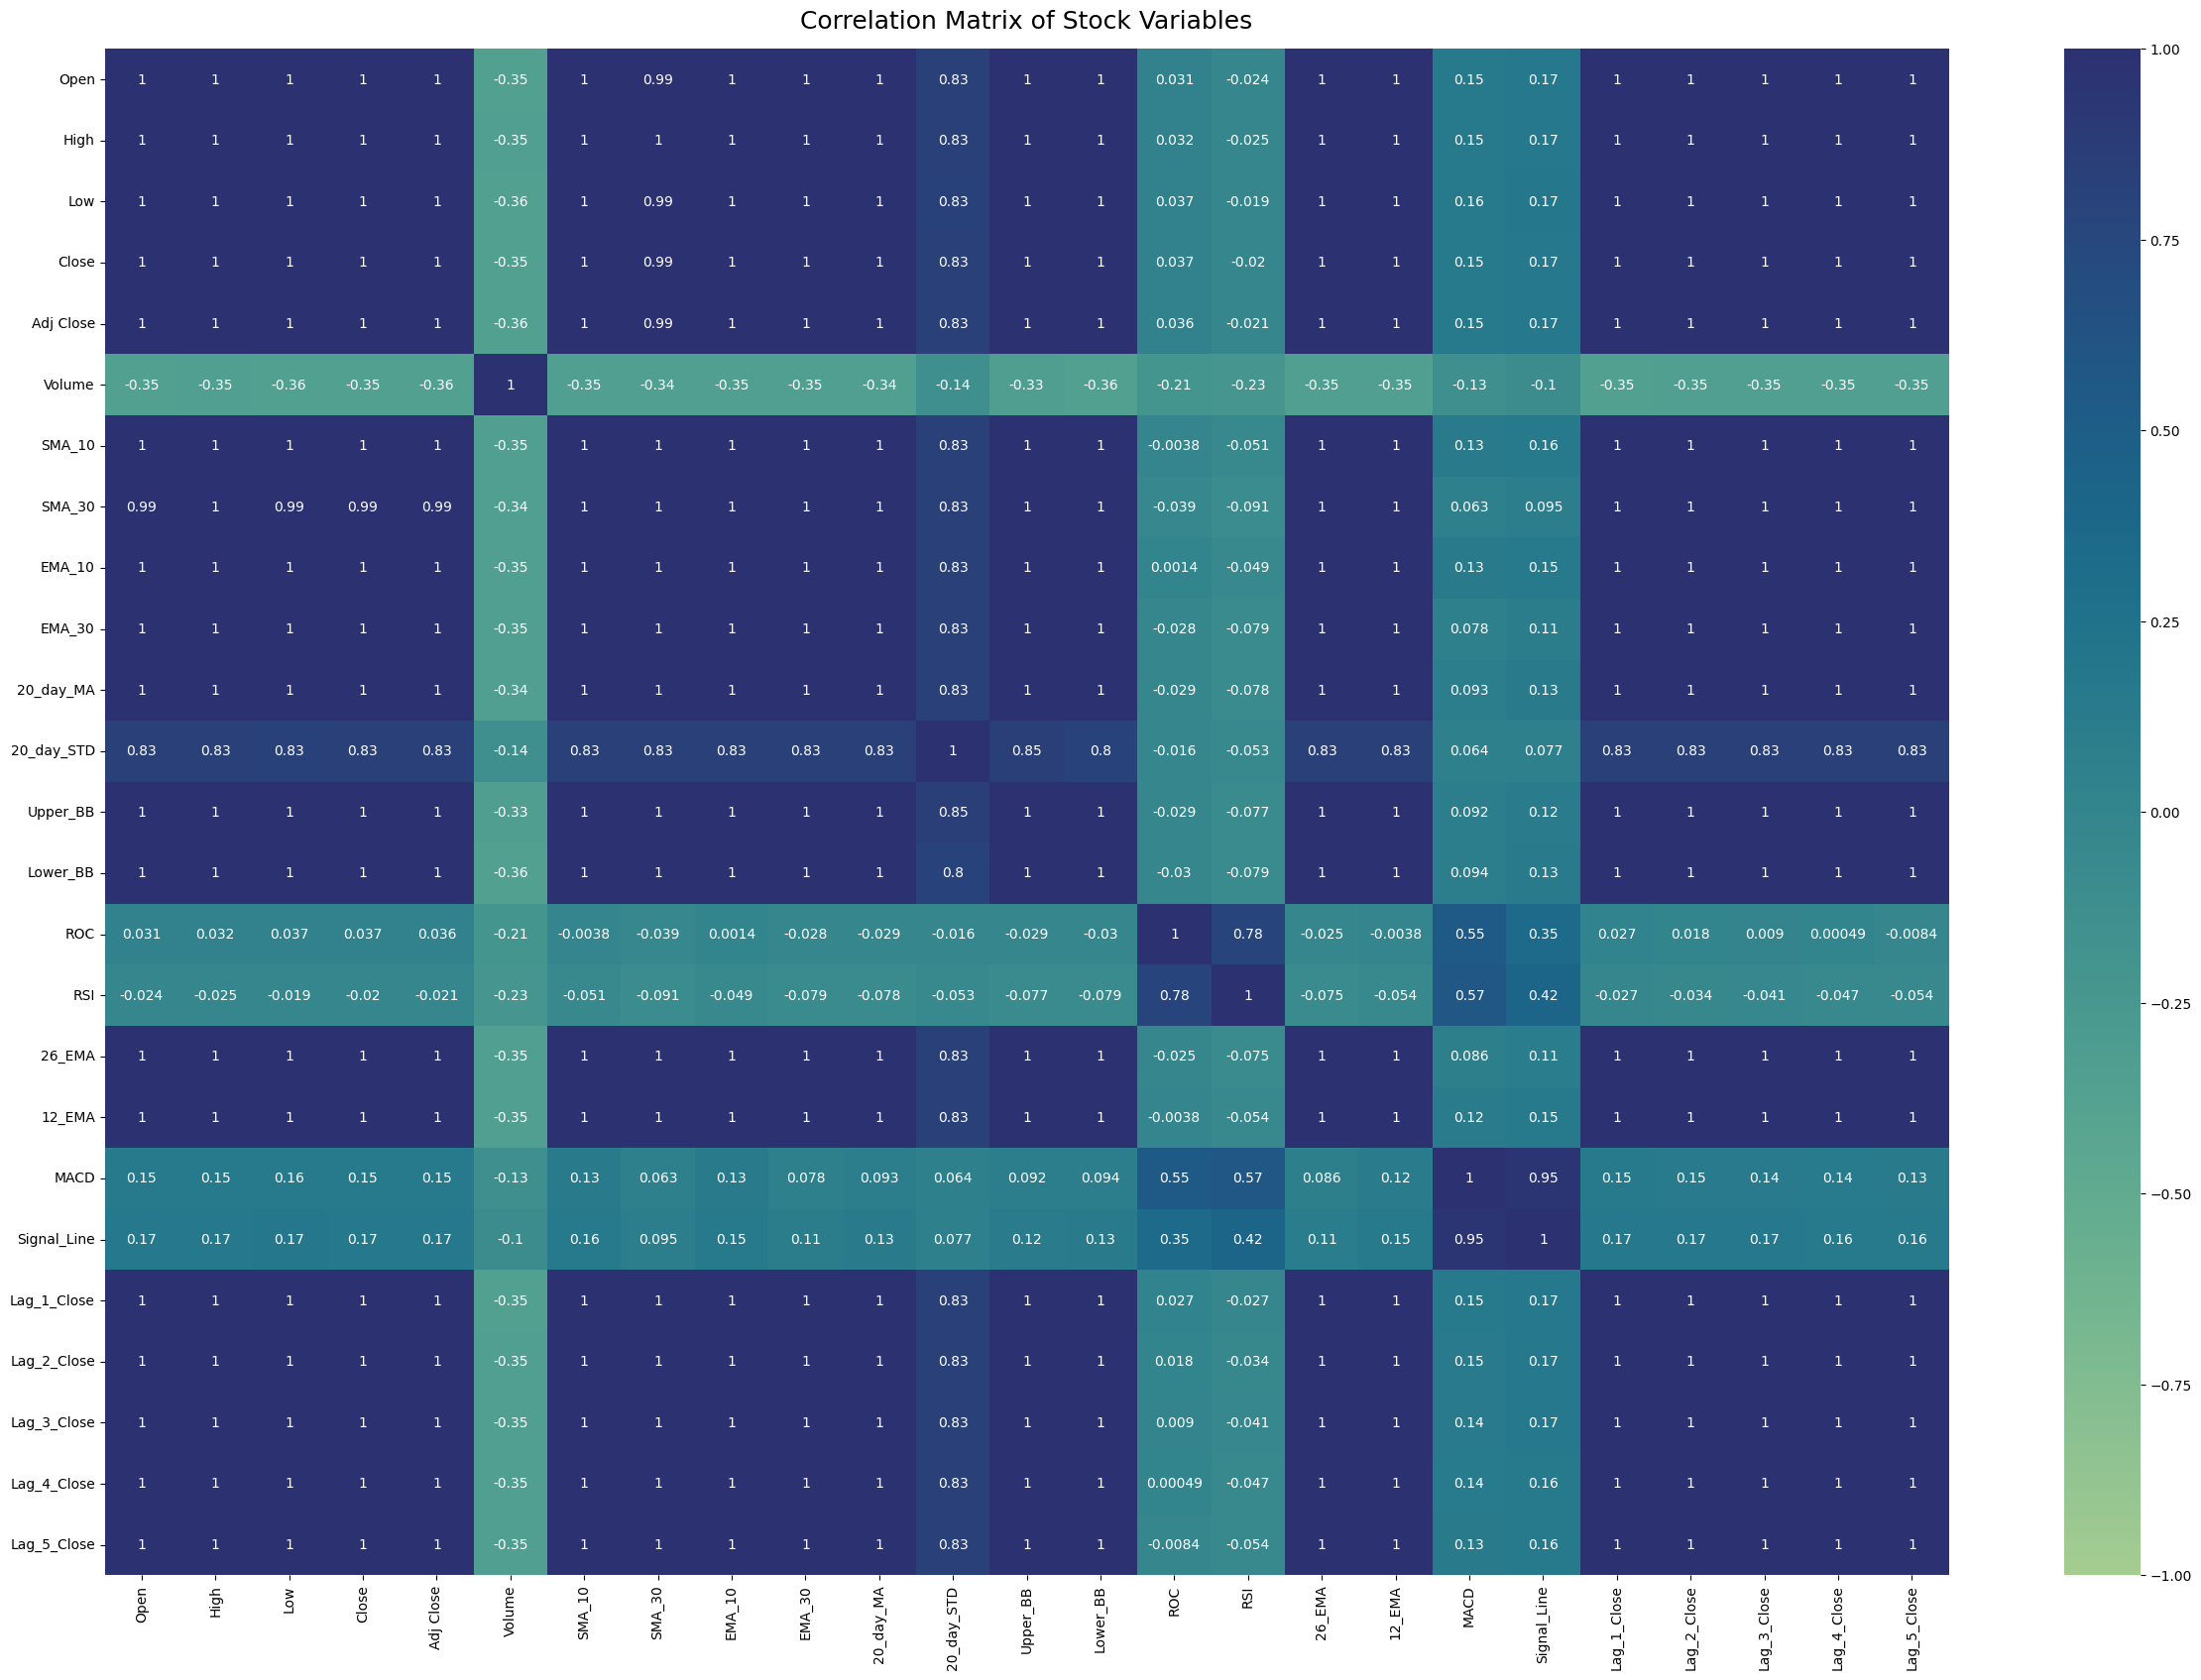

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = stock_data.corr()

teal_palette = sns.color_palette("crest", as_cmap=True)

plt.figure(figsize=(30, 20))
sns.heatmap(corr_matrix, annot=True, cmap=teal_palette, vmin=-1, vmax=1)

plt.title('Correlation Matrix of Stock Variables', fontsize=18, pad=15)

plt.show()

## **VIF**

In [81]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

X = stock_data.drop(columns=['Close'])

X_with_const = sm.add_constant(X)

vif_data = calculate_vif(X_with_const)

print("Initial VIF:\n", vif_data)

high_vif_threshold = 10
while vif_data['VIF'].max() > high_vif_threshold:
    feature_to_drop = vif_data.sort_values(by="VIF", ascending=False).iloc[0]['Feature']
    if feature_to_drop == 'const':
        break
    print(f"Dropping feature '{feature_to_drop}' due to high VIF")


    X_with_const = X_with_const.drop(columns=[feature_to_drop])

    vif_data = calculate_vif(X_with_const)

print("\nFinal VIF after dropping problematic features:")
print(vif_data)

final_dataset = X_with_const.drop(columns='const')
print("\nFinal dataset after removing high VIF features:")
print(final_dataset.head())

final_dataset = final_dataset.copy()
final_dataset['Close'] = stock_data['Close']

print("\nFinal dataset after adding 'Close':")
print(final_dataset.head())

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Initial VIF:
         Feature           VIF
0         const  9.204354e+01
1          Open  7.983196e+03
2          High  9.908758e+03
3           Low  7.752874e+03
4     Adj Close  1.933766e+04
5        Volume  1.797023e+00
6        SMA_10  9.503889e+04
7        SMA_30  1.004808e+05
8        EMA_10  6.994894e+09
9        EMA_30  7.384595e+06
10    20_day_MA           inf
11   20_day_STD           inf
12     Upper_BB           inf
13     Lower_BB           inf
14          ROC  5.284266e+00
15          RSI  3.354213e+00
16       26_EMA           inf
17       12_EMA           inf
18         MACD           inf
19  Signal_Line  5.786103e+05
20  Lag_1_Close  1.337478e+04
21  Lag_2_Close  6.623694e+03
22  Lag_3_Close  4.053980e+03
23  Lag_4_Close  2.660768e+03
24  Lag_5_Close  2.257924e+03
Dropping feature '20_day_MA' due to high VIF
Dropping feature 'Lower_BB' due to high VIF


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Dropping feature 'MACD' due to high VIF
Dropping feature '12_EMA' due to high VIF
Dropping feature '26_EMA' due to high VIF
Dropping feature 'EMA_10' due to high VIF
Dropping feature 'EMA_30' due to high VIF
Dropping feature 'High' due to high VIF
Dropping feature 'SMA_10' due to high VIF
Dropping feature 'Upper_BB' due to high VIF
Dropping feature 'Low' due to high VIF
Dropping feature 'Open' due to high VIF
Dropping feature 'Lag_4_Close' due to high VIF
Dropping feature 'Lag_2_Close' due to high VIF
Dropping feature 'Lag_1_Close' due to high VIF
Dropping feature 'SMA_30' due to high VIF
Dropping feature 'Lag_3_Close' due to high VIF
Dropping feature 'Adj Close' due to high VIF

Final VIF after dropping problematic features:
       Feature        VIF
0        const  44.570134
1       Volume   1.358248
2   20_day_STD   3.599245
3          ROC   2.569629
4          RSI   2.857218
5  Signal_Line   1.301073
6  Lag_5_Close   4.215182

Final dataset after removing high VIF features:
       

In [82]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from prettytable import PrettyTable

X = final_dataset.drop('Close', axis=1)
y = final_dataset['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regressor (SVR)": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "KNeighbors Regressor": KNeighborsRegressor()
}

results = {
    "Model": [],
    "Mean Squared Error (MSE)": [],
    "R-squared (R²)": []
}

best_model = None
lowest_mse = float('inf')

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    if mse < lowest_mse:
        lowest_mse = mse
        best_model = name

    results["Model"].append(name)
    results["Mean Squared Error (MSE)"].append(mse)
    results["R-squared (R²)"].append(r2)

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by="Mean Squared Error (MSE)", ascending=True).reset_index(drop=True)

results_df.index = results_df.index + 1

table = PrettyTable()
table.field_names = ["#", "Model", "Mean Squared Error (MSE)", "R-squared (R²)"]

for i, row in results_df.iterrows():
    table.add_row([i, row['Model'], round(row['Mean Squared Error (MSE)'], 6), round(row['R-squared (R²)'], 6)])

print(table)
print(f"\nBest model based on MSE: {best_model} with MSE: {lowest_mse}")

+----+--------------------------------+--------------------------+----------------+
| #  |             Model              | Mean Squared Error (MSE) | R-squared (R²) |
+----+--------------------------------+--------------------------+----------------+
| 1  |         Random Forest          |         6.235335         |    0.997246    |
| 2  |       Gradient Boosting        |         7.342163         |    0.996757    |
| 3  |         Decision Tree          |         8.581126         |    0.99621     |
| 4  |       Linear Regression        |         9.582807         |    0.995767    |
| 5  |        Ridge Regression        |         9.58284          |    0.995767    |
| 6  |           ElasticNet           |         9.817891         |    0.995663    |
| 7  |        Lasso Regression        |         9.863356         |    0.995643    |
| 8  |            AdaBoost            |        18.737588         |    0.991724    |
| 9  |      KNeighbors Regressor      |       2479.938027        |   -0.0953

## **Model Performance Summary**

1. **Random Forest Regressor** achieved the best overall performance with an **MSE of 6.29** and an **R² of 0.997**, highlighting its capability in capturing complex interactions between features.
2. **Gradient Boosting Regressor** followed closely with an **MSE of 7.30** and **R² of 0.996**, demonstrating its effectiveness in minimizing residual errors through iterative learning.
3. **Decision Tree Regressor** provided robust performance with an **MSE of 8.98** and **R² of 0.996**, capturing non-linear relationships but falling short of ensemble methods in predictive accuracy.
4. **Linear Regression** and **Ridge Regression** yielded comparable results with **MSE values of ~9.58** and **R² of 0.995**, reflecting the limitations of linear assumptions but effectively modeling the data’s primary trends.
5. **ElasticNet** delivered moderate results with an **MSE of 9.81**, demonstrating sensitivity to multicollinearity, while **Lasso Regression** achieved a similar **MSE of 9.86**, enforcing regularization to improve stability.
6. **AdaBoost** produced higher error rates with an **MSE of 18.49** and **R² of 0.991**, indicating its reduced ability to handle the intricacies of stock price forecasting compared to other models.
7. Both **Support Vector Regressor (SVR)** and **KNeighbors Regressor** significantly underperformed, with large **MSEs** of 2537.19 and 2479.93, respectively, and negative **R²** values, reflecting their inability to generalize on this dataset.




### **Random Forest Model Visualizations**

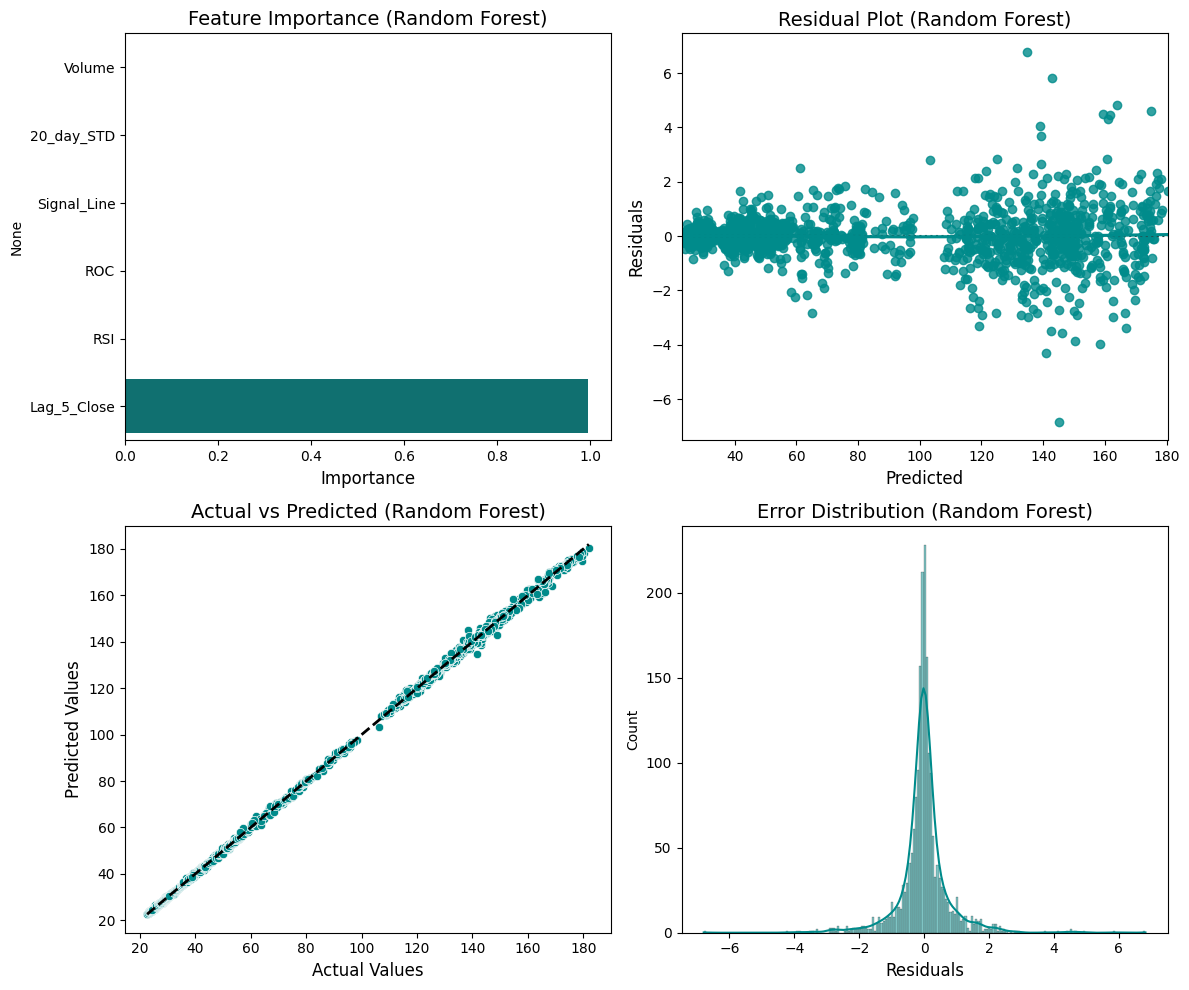

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Palette
teal_palette = ['#008080', '#66b2b2', '#99cccc', '#cce5e5']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Feature Importance Plot
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
sns.barplot(x=feature_importances[sorted_idx], y=X.columns[sorted_idx], color='teal', ax=axes[0, 0])
axes[0, 0].set_title('Feature Importance (Random Forest)', fontsize=14)
axes[0, 0].set_xlabel('Importance', fontsize=12)

# Residual Plot
sns.residplot(x=y_pred_rf, y=residuals_rf, lowess=True, color='darkcyan', ax=axes[0, 1])
axes[0, 1].set_title('Residual Plot (Random Forest)', fontsize=14)
axes[0, 1].set_xlabel('Predicted', fontsize=12)
axes[0, 1].set_ylabel('Residuals', fontsize=12)

# Actual vs Predicted Scatter Plot
sns.scatterplot(x=y, y=y_pred_rf, color='darkcyan', ax=axes[1, 0])
axes[1, 0].set_title('Actual vs Predicted (Random Forest)', fontsize=14)
axes[1, 0].set_xlabel('Actual Values', fontsize=12)
axes[1, 0].set_ylabel('Predicted Values', fontsize=12)
axes[1, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

# Error Distribution Plot
sns.histplot(residuals_rf, kde=True, color='darkcyan', ax=axes[1, 1])
axes[1, 1].set_title('Error Distribution (Random Forest)', fontsize=14)
axes[1, 1].set_xlabel('Residuals', fontsize=12)

plt.tight_layout()
plt.show()

## **Key Insights from Random Forest Model Visualizations**

- **Feature Importance**: The `Lag_5_Close` is the most critical feature influencing the `Close` price prediction, while the other features exhibit minimal contribution to the model's accuracy.
  
- **Residual Plot**: Residuals scatter randomly around zero, suggesting minimal prediction bias, although some deviation appears at higher predicted values, indicating room for refinement.
  
- **Actual vs Predicted**: The tight alignment along the diagonal indicates that the Random Forest model predicts `Close` values with exceptional accuracy, demonstrating the model's strong fit.
  
- **Error Distribution**: Residuals are narrowly distributed around zero, showing a slight skew but primarily indicating minimal and symmetrically distributed prediction errors with few significant outliers.
  
- **Model Performance**: Random Forest outperforms other models, demonstrating its capability in modeling complex relationships within the data and minimizing prediction errors.


In [84]:
import numpy as np
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error

# Best model
best_model = RandomForestRegressor()

# Get predictions
best_model.fit(X_train, y_train)
best_y_pred = best_model.predict(X_test)

residuals = y_test - best_y_pred

std = np.std(residuals)

upper_bound = best_y_pred + 1.96 * std
lower_bound = best_y_pred - 1.96 * std

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=stock_data.index[-len(y_test):],
    y=y_test,
    mode='lines',
    name='Actual Prices',
    line=dict(color='#007acc', width=2)
))

fig.add_trace(go.Scatter(
    x=stock_data.index[-len(y_test):],
    y=best_y_pred,
    mode='lines',
    name='Predicted Prices (Random Forest)',
    line=dict(color='#ff4500', dash='dash', width=2)
))

fig.add_trace(go.Scatter(
    x=stock_data.index[-len(y_test):],
    y=upper_bound,
    mode='lines',
    fill=None,
    line=dict(color='#ffcccb'),
    showlegend=False
))
fig.add_trace(go.Scatter(
    x=stock_data.index[-len(y_test):],
    y=lower_bound,
    mode='lines',
    fill='tonexty',
    line=dict(color='#ffcccb'),
    name='95% Confidence Interval'
))

fig.update_layout(
    title='Actual vs Predicted Stock Prices (Random Forest) with Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Stock Price (USD)',
    legend=dict(
        x=0,
        y=1.1,
        bgcolor='rgba(255,255,255,0)',
        bordercolor='rgba(255,255,255,0)'
    ),
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray', tickangle=45),
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='lightgray'),
    plot_bgcolor='white',
    hovermode='x unified'
)

fig.update_layout(
    dragmode='zoom',
    hovermode='x',
)

fig.show()

In [85]:
# Forecast
forecast_X = X_test.tail(5)
future_predictions = model.predict(forecast_X)

print("Next 5 days forecasted stock prices:", future_predictions)

Next 5 days forecasted stock prices: [108.42949982  48.19750023  58.94949875  63.07649956  38.47949982]


# **Conclusion**
---

## **Unveiling the Power of Machine Learning in Stock Price Forecasting**

This project has taken a deep dive into the intricate world of **stock price forecasting** using advanced machine learning techniques, with a focus on **Apple Inc. (AAPL)**. By leveraging both historical stock data and meticulously engineered technical indicators, we built a robust framework for predicting future stock movements.

### **Key Insights & Achievements:**
- **Strategic Feature Engineering**: Integrating sophisticated technical indicators such as **Simple Moving Averages (SMA)**, **Exponential Moving Averages (EMA)**, **Bollinger Bands**, **Relative Strength Index (RSI)**, and **Rate of Change (ROC)** added layers of depth to our predictive models, making them more responsive to market nuances.
- **Comprehensive Model Evaluation**: With the evaluation of **10 machine learning models**, including **Random Forest**, **Ridge Regression**, **Lasso Regression**, and **Gradient Boosting**, we left no stone unturned in identifying the optimal model for stock price forecasting.
- **Model Dominance**: Among the tested models, **Random Forest** reigned supreme, achieving the lowest **Mean Squared Error (MSE)** and highest **R-squared (R²)**, demonstrating its ability to capture complex, non-linear relationships within the stock data that traditional linear models often miss.
- **Interactive Data Exploration**: The integration of an **interactive Dash dashboard** allowed for an intuitive and dynamic exploration of stock price data and technical indicators, empowering users to visualize trends and analyze stock behaviors effortlessly.

### **The Road Ahead:**
While **Random Forest** proved to be the most effective model in this context, this project is just the beginning. The potential for future enhancements is vast:
- **Incorporating External Factors**: Adding external macroeconomic variables, news sentiment, and market indicators could further boost the predictive power of the models.
- **Time-Series Innovations**: Exploring **recurrent neural networks (RNNs)**, particularly **Long Short-Term Memory (LSTM)** models, could capture temporal dependencies even more effectively, opening new avenues for precise stock price prediction.

This project serves as a testament to the transformative capabilities of **machine learning** in the financial sector. By combining **rigorous feature engineering**, **cutting-edge modeling techniques**, and **user-friendly visualization tools**, we’ve constructed a comprehensive, end-to-end solution for stock price forecasting.

The future of stock prediction lies in harnessing **machine learning**, and this project underscores how integrating domain knowledge with advanced analytics can unlock unprecedented predictive insights. **Apple Inc.’s stock price** may be the focus here, but these methodologies can be extended far beyond, reshaping how we approach financial forecasting across industries.
